In [1]:
### Define all packages and modules needed for the notebook.

In [7]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read in external datasets generated from 'NCVS Data Cleaning.ipynb' and 'Stock Data Cleaning.ipynb'
- NCVS - Read in cleaned primary dataset and 4 additional groupby datasets
- Dow Jones - Read in groupby dataset

In [8]:
ncvs_csv_path = "../DataCleaning/NCVS_Clean"
ncvs_df = pd.read_csv(ncvs_csv_path)
ncvs_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_csv_path = "../DataCleaning/group_ager_df"
group_ager_df = pd.read_csv(ager_csv_path)
group_ager_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

newcrime_csv_path = "../DataCleaning/group_newcrime_df"
group_newcrime_df = pd.read_csv(newcrime_csv_path)
group_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_newcrime_csv_path = "../DataCleaning/group_ager_newcrime_df"
group_ager_newcrime_df = pd.read_csv(ager_newcrime_csv_path)
group_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

year_ager_newcrime_csv_path = "../DataCleaning/group_year_ager_newcrime_df"
group_year_ager_newcrime_df = pd.read_csv(year_ager_newcrime_csv_path)
group_year_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

DowJones_csv_path = "../DataCleaning/DowJones_Clean"
DowJones_df = pd.read_csv(DowJones_csv_path)
DowJones_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

### Create a merged dataset between 'year_ager_newcrime_df' and 'DowJones_df'
- Merging on year - **Must specify** age group and crime group to get a row for each year.
- The merged dataset is designed to function this way, use the following as a template to define an appropriate dataset:
    - **ager_newcrime_df = merged_df.loc[(merged_df["ager"] == "VALUE") & (merged_df["newcrime"] == "VALUE")]**

In [9]:
merged_df = group_year_ager_newcrime_df.merge(DowJones_df, left_on = "year", right_on = "Year")

### Display our standard datasets
- Remove the hashtag and **Run** in order to view any one of our standard datasets.

In [2]:
# ncvs_df

# group_ager_df
# group_newcrime_df
# group_ager_newcrime_df
# group_year_ager_newcrime_df

# DowJones_df

# merged_df

### Define 'merged_df' subsets
- Create any needed subsets from the 'merged_df' dataset using the template above.
- Specify the 'ager' and 'newcrime' argument when creating a new dataset.

In [10]:
threefivetofournine_violent_df = merged_df.loc[(merged_df["ager"] == "35 to 49") & (merged_df["newcrime"] == "Violent victimization")]

### Pie Chart - 'race1r'
- Create a pie chart to show the proportion breakdown by major racial categories:
    - Black, White, Other

In [17]:
race = ncvs_df["race1r"].value_counts() # Don't need?
# Different explode?
ncvs_df['race1r'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.show()

### Pie Chart - 'gender'
- Create a pie chart to show the proportion breakdown by gender.

In [18]:
# Change this to make it cleaner
gender_vic = ncvs_df.groupby('gender')
gender_group = gender_vic.count()
labels = ["Male", "Female"]
gender_count = gender_group["year"].tolist()
plt.pie(gender_count, labels=labels)
plt.show()

### Pie Chart - 'vicservices'
- Create a pie chart to show the proportion breakdown of victims that recieved victim services:
    - 'Services received from victim service agencies', 'No services received from victim service agencies'

In [14]:
vic_serv = ncvs_df["vicservices"].value_counts() # Don't need?
ncvs_df['vicservices'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.show()

### Bar Chart - 'Average Close'
- Create a pie chart to show the proportion breakdown of victims that recieved victim services:
    - 'Services received from victim service agencies', 'No services received from victim service agencies'

<IPython.core.display.Javascript object>


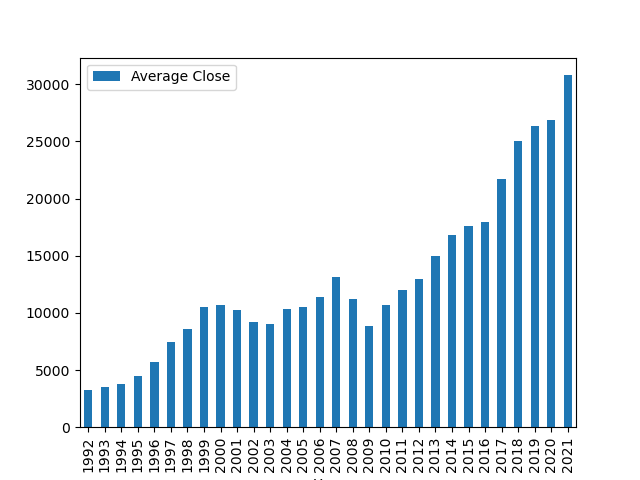

In [24]:
# Add a title, adjust other things?
tempDowJones_df = DowJones_df.set_index("Year")
avgclose_bar = tempDowJones_df[["Average Close"]].plot(kind="bar")
plt.show()

### Bar Chart - Age Groups X Crime Type
- Create a bar chart to show the count of victims in each age group:

In [19]:
# Use existing datasets... no need to create a new dataset
# Use group_ager_newcrime_df !!! 'count' for raw counts in those categories
# and 'proportion_age' for proportion values within that age group

age_vic = ncvs_df.groupby("ager")
crime_age_vic = age_vic["newcrime"].count()
crime_age_vic_list = crime_age_vic.values.tolist()
ages_list = ["12 to 14","15 to 17","18 to 20","21 to 24","25 to 34","35 to 49","50 to 64","65 or older"]
plt.bar(ages_list, crime_age_vic_list)
plt.title("Amount of Victimization by age group")
plt.xlabel("Age of Victimization")
plt.ylabel("Total Victimizations")
plt.xticks(rotation=45)
plt.show()

### Line Chart - Victimization Over Time - '25 to 34' against '35 to 49'
- Create a line chart to show victimization over time for the '25 to 34' and '35 to 49' age groups.

<IPython.core.display.Javascript object>


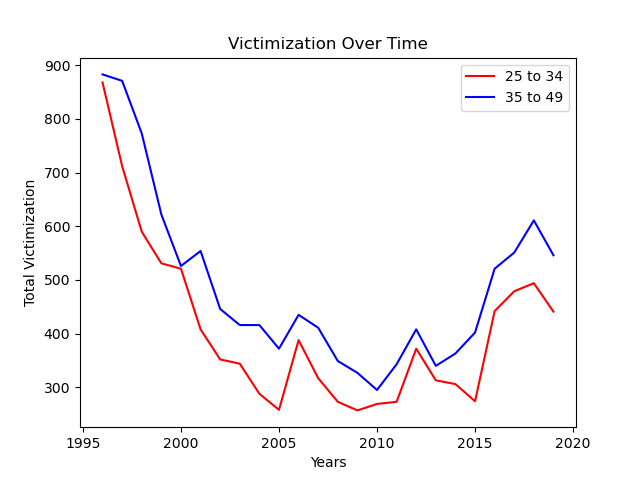

In [30]:
# Clean up - remove unnecessary code
# Use existing datasets... no need to create a new dataset
# Use group_year_ager_newcrime_df !!! 'count_year_ager' gives the count in that year and age group ignoring newcrime type
# The current output appears to be double what we're seeing in the dataframe

group_age = group_year_ager_newcrime_df[(group_year_ager_newcrime_df["ager"] == "25 to 34") | (group_year_ager_newcrime_df["ager"] == "35 to 49")]
#group_age.head()
age_vic = group_age.groupby(["year","ager"]).sum() # Pretty sure this already exists in one of the dataframes
age_vic_reset = age_vic.reset_index()
# group_ages
#first = group_age.query("ager == '25 to 34'")
#second = group_age.query("ager == '35 to 49'")
plt.figure(2)
plt.plot(age_vic_reset.query("ager == '25 to 34'")['year'], age_vic_reset.query("ager == '25 to 34'")['count'],color='red', label = "25 to 34")
plt.plot(age_vic_reset.query("ager == '35 to 49'")['year'], age_vic_reset.query("ager == '35 to 49'")['count'],color='blue', label = "35 to 49")
plt.legend(loc="upper right")
plt.xlabel("Years")
plt.ylabel("Total Victimization")
plt.title("Victimization Over Time")
#plt.plot(age_vic['year'], age_vic['count'])

plt.show()

### Bar Chart - Percent Change vs Violent Victimizaton Proportion - '35 to 49' and 'Violent Victimization'
- Create a line chart to show victimization over time for the '25 to 34' and '35 to 49' age groups.

<IPython.core.display.Javascript object>


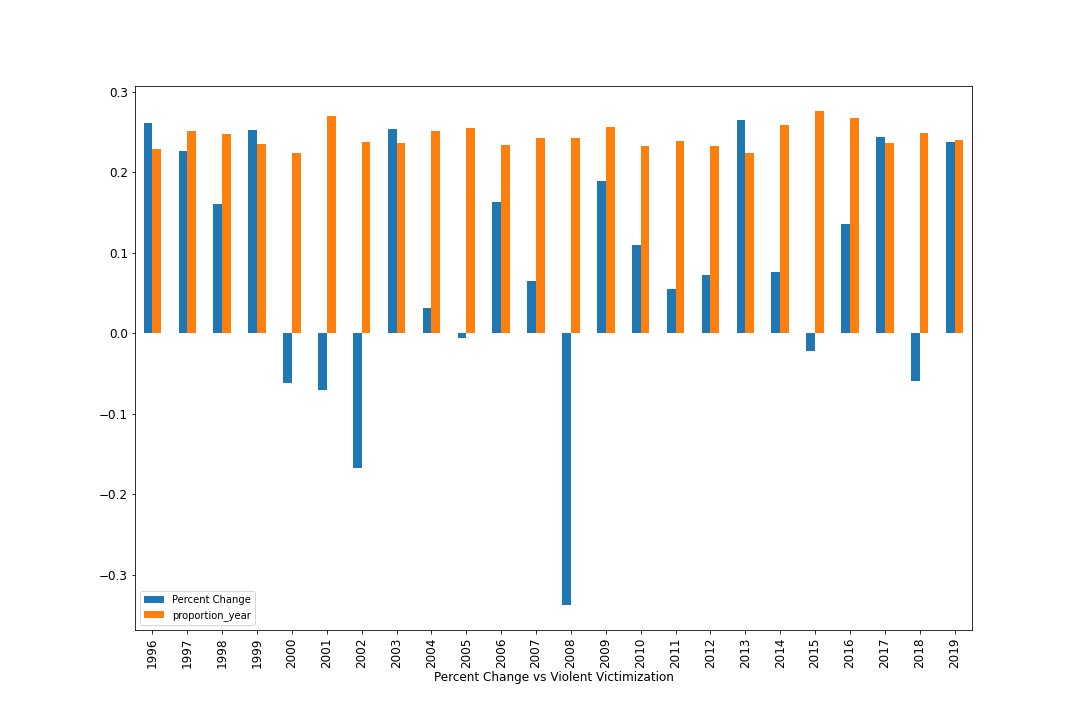

In [20]:
# Update legend
# Title to the top - mention proportion
# Remove font size

temp_df = threefivetofournine_violent_df.set_index("Year")

ax = temp_df[['Percent Change', 'proportion_year']].astype(float).plot(kind='bar', title =" ", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Percent Change vs Violent Victimization", fontsize=12)
ax.set_ylabel("", fontsize=12)
plt.show()